In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense
from keras import regularizers

In [34]:
df = pd.read_csv('Data1_Columbia.csv')

In [35]:
# Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

In [36]:
# Split the dataset into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size, :], scaled_data[train_size:, :]

In [37]:
# Prepare the data for training and testing
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :])
        y.append(data[i+seq_length, -1])
    return np.array(X), np.array(y)

In [38]:
seq_length = 10  # Define the sequence length for input
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [39]:
# Reshape the input data to match the expected input shape of the CNN-LSTM model
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], df.shape[1])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], df.shape[1])

In [40]:
# Build the model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(seq_length, df.shape[1])))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, activation='relu'))

#regularizer
model.add(Dense(500,kernel_regularizer= regularizers.l2(0.01),activation= 'relu'))
model.add(Dense(1))

In [41]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [42]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50


386/386 [==============================] - 5s 6ms/step - loss: 0.1032 - val_loss: 0.0095
Epoch 2/50
386/386 [==============================] - 2s 5ms/step - loss: 0.0029 - val_loss: 0.0015
Epoch 3/50
386/386 [==============================] - 2s 5ms/step - loss: 1.5584e-04 - val_loss: 9.9637e-04
Epoch 4/50
386/386 [==============================] - 2s 5ms/step - loss: 6.5626e-06 - val_loss: 9.7646e-04
Epoch 5/50
386/386 [==============================] - 2s 5ms/step - loss: 1.4748e-06 - val_loss: 9.7972e-04
Epoch 6/50
386/386 [==============================] - 2s 5ms/step - loss: 1.5309e-06 - val_loss: 9.7419e-04
Epoch 7/50
386/386 [==============================] - 2s 4ms/step - loss: 1.8149e-06 - val_loss: 9.7466e-04
Epoch 8/50
386/386 [==============================] - 2s 4ms/step - loss: 1.0173e-06 - val_loss: 9.7413e-04
Epoch 9/50
386/386 [==============================] - 2s 5ms/step - loss: 1.7348e-06 - val_loss: 9.7761e-04
Epoch 10/50
386/386 [==============================] - 

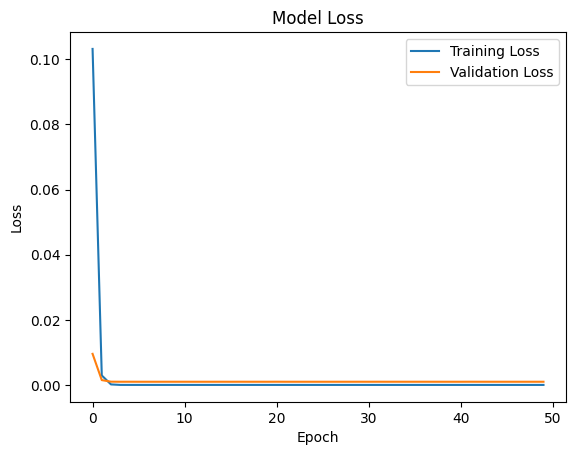

In [43]:
# Plot accuracy and loss graph
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [44]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test loss:", loss)

97/97 [==============================] - 0s 2ms/step - loss: 9.7654e-04
Test loss: 0.0009765353752300143


In [45]:
# Make predictions
predictions = model.predict(X_test)


97/97 [==============================] - 0s 2ms/step


In [46]:
# Reshape predictions to match the original shape
predictions = np.repeat(predictions, df.shape[1], axis=1)

In [47]:
# Print a single prediction
print("Predicted rainfall:", predictions[0][0])

Predicted rainfall: 1.0001248
